In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from neuralNetwork import neuralNetwork as nn


In [2]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
tShape1, tShape2, tShape3 = xTrain.shape
xTrain = xTrain.reshape((tShape1, tShape2*tShape3))
tS, tShape2, tShape3 = xTest.shape
xTest = xTest.reshape((tS, tShape2*tShape3))

mean = np.mean(xTrain)
sd = np.std(xTrain)

xTest = (xTest-mean)/sd
xTrain = (xTrain-mean)/sd

yTest = np.eye(10)[yTest]
yTrain = np.eye(10)[yTrain]


In [3]:
def trainModel(lr, activationFunc, initialWeights, batch):
    model = nn(6, [784, 256, 128, 64, 32, 10], epoch=100, lr=lr,
               activationFunc=activationFunc, initialWeights=initialWeights, batch=batch)
    model.fit(xTrain, yTrain, xTest, yTest)
    accuracy = []
    i = 0
    while(i < 9984):
        accuracy.append(model.accuracyScore(
            yTest[i:i+batch], model.predict(xTest[i:i+batch])))
        i += batch
    print("Accuracy obtained on the testing data is ", np.mean(accuracy))
    model.costPlot()


In [ ]:
trainModel(0.001, "relu", "normal", 128)


Accuracy obtained on the testing data is  0.10837339743589744


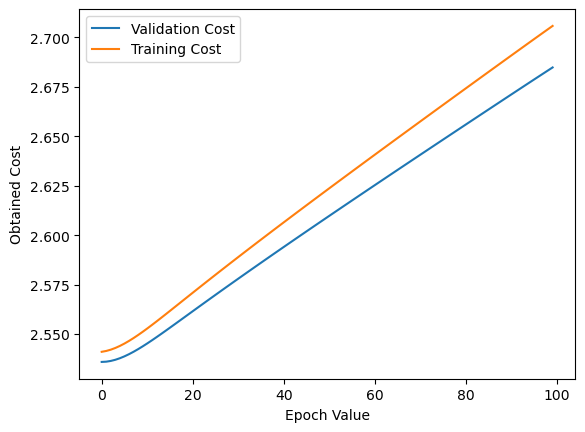

In [4]:
trainModel(0.01, "sigmoid", "random", 64)


Accuracy obtained on the testing data is  0.11348157051282051


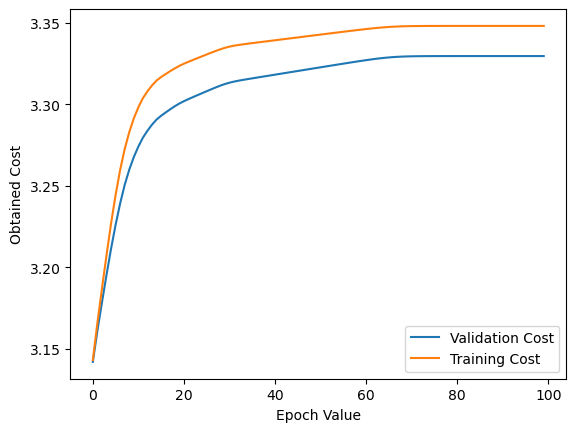

In [5]:
trainModel(0.5, "tanh", "normal", 256)


In [ ]:
trainModel(0.5, "tanh", "normal", 256)
trainModel(1, "leaky_relu", "random", 128)
trainModel(0.1, "linear", "normal", 64)
